In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold

In [2]:
from create_matrix import *

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']
region = "SanDiego"
year = 2014

import os
from degree_days import dds



def un_normalize(x, maximum, minimum):
    return (maximum - minimum) * x + minimum

In [3]:
def get_tensor(df, dfc):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER]).flatten()

    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())
    weather_values = np.array(dds[2014][region][start - 1:stop - 1]).reshape(-1, 1)

    dfc = df.copy()

    df = dfc[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), 7, stop - start))
    M, N, O = tensor.shape
    return tensor

In [4]:
sd_df, sd_dfc = create_matrix_single_region("SanDiego", year)
sd_tensor = get_tensor(sd_df, sd_dfc)
au_df, au_dfc = create_matrix_single_region('Austin', year)
au_tensor = get_tensor(au_df, au_dfc)
sd_tensor_copy = sd_tensor.copy()
au_tensor_copy = au_tensor.copy()

In [28]:
a=2
case=2
cost='abs'
H_au, A_au, T_au = learn_HAT(case, au_tensor_copy, a, a, num_iter=2000, lr=0.1, dis=False, cost_function=cost)


In [29]:
H_sd, A_sd, T_sd = learn_HAT(case, sd_tensor_copy, a, a, num_iter=2000, lr=0.1, dis=False, cost_function=cost)

In [7]:
T_sd

array([[ 2.7373918 ,  5.483737  ,  0.        ],
       [ 2.51474511,  4.73472896,  0.        ],
       [ 3.42995343,  4.35415882,  0.        ],
       [ 4.47318013,  3.00934251,  0.56585557],
       [ 3.30831757,  2.5911144 ,  4.70036959],
       [ 5.80414166,  0.2621231 ,  2.99336574],
       [ 2.42841363,  2.36701749,  8.02668915],
       [ 3.21304334,  1.15030641,  9.06045135],
       [ 1.99887471,  3.15250419,  9.88394306],
       [ 4.01488298,  3.21894855,  3.64208518],
       [ 4.08702319,  4.0930259 ,  0.10978917],
       [ 5.31206824,  3.98835299,  0.0492658 ]])

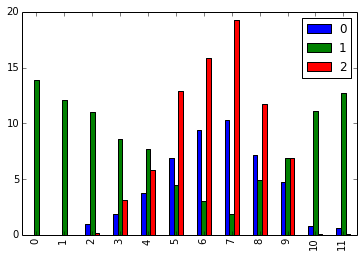

In [8]:
pd.DataFrame(T_au).plot(kind='bar')

In [9]:
for appliance in APPLIANCES_ORDER:
    print appliance

aggregate
hvac
fridge
mw
dw
wm
oven


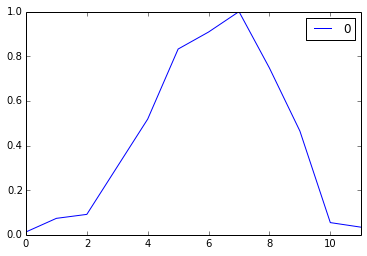

In [10]:
pd.DataFrame(dds[2014]['Austin']).plot()

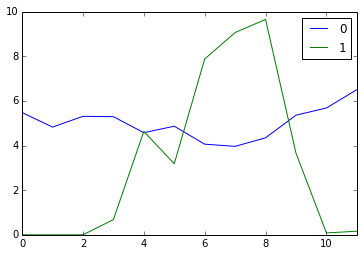

In [30]:
pd.DataFrame(T_sd).plot()

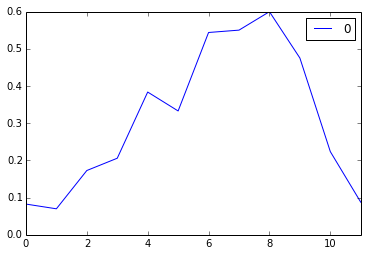

In [12]:
pd.DataFrame(dds[2014]['SanDiego']).plot()

In [13]:
AT_au = np.einsum('Nab, Ob -> NaO', A_au, T_au)

In [14]:
AT_sd = np.einsum('Nab, Ob -> NaO', A_sd, T_sd)

In [15]:
X_au = np.einsum('Ma, NaO -> MNO', H_au, AT_au)

In [16]:
pd.DataFrame(AT_au[2].T)

,0,1
0,11.542276,24.783078
1,10.011608,21.496494
2,9.769674,20.661057
3,9.050449,20.027073
4,10.114814,22.717940
5,11.021232,26.462689
6,12.059975,29.007112
7,12.470767,30.982628
8,11.261441,26.408591
9,10.256038,23.126149


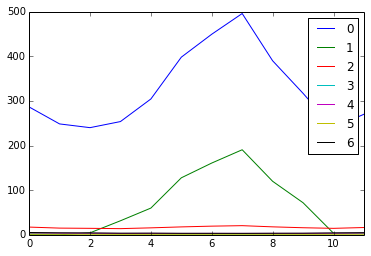

In [17]:
pd.DataFrame(X_au[0].T).plot()

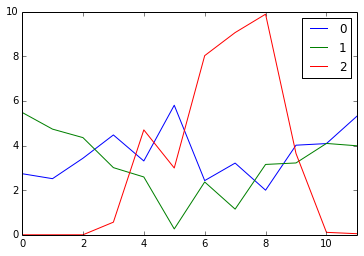

In [27]:
pd.DataFrame(T_sd).plot()

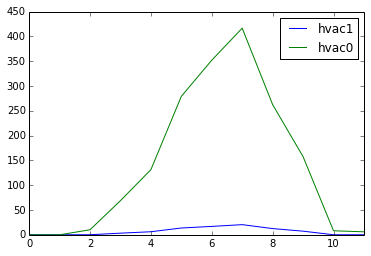

In [18]:
idx=1
pd.DataFrame(AT_au[idx].T, columns={APPLIANCES_ORDER[idx]+"0", APPLIANCES_ORDER[idx]+"1"}).plot()

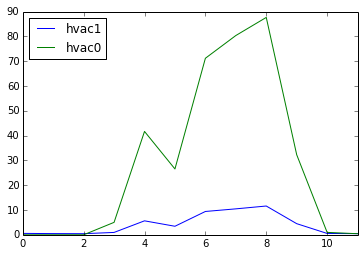

In [19]:
pd.DataFrame(AT_sd[idx].T, columns={APPLIANCES_ORDER[idx]+"0", APPLIANCES_ORDER[idx]+"1"}).plot()

In [20]:
T_sd

array([[ 2.7373918 ,  5.483737  ,  0.        ],
       [ 2.51474511,  4.73472896,  0.        ],
       [ 3.42995343,  4.35415882,  0.        ],
       [ 4.47318013,  3.00934251,  0.56585557],
       [ 3.30831757,  2.5911144 ,  4.70036959],
       [ 5.80414166,  0.2621231 ,  2.99336574],
       [ 2.42841363,  2.36701749,  8.02668915],
       [ 3.21304334,  1.15030641,  9.06045135],
       [ 1.99887471,  3.15250419,  9.88394306],
       [ 4.01488298,  3.21894855,  3.64208518],
       [ 4.08702319,  4.0930259 ,  0.10978917],
       [ 5.31206824,  3.98835299,  0.0492658 ]])

In [21]:
AT_au[1]

array([[  0.00000000e+00,   0.00000000e+00,   1.37688344e-01,
          3.29572485e+00,   6.17024429e+00,   1.37013140e+01,
          1.69167204e+01,   2.04723643e+01,   1.25375630e+01,
          7.32469548e+00,   9.71493501e-02,   7.42666870e-02],
       [  0.00000000e+00,   0.00000000e+00,   1.01501939e+01,
          6.88319806e+01,   1.31276250e+02,   2.79163619e+02,
          3.51991263e+02,   4.16597694e+02,   2.62542834e+02,
          1.57590326e+02,   8.11726461e+00,   6.02565542e+00]])

In [22]:
AT_sd[1]

array([[  0.56577203,   0.48849484,   0.44923038,   0.95638868,
          5.6326589 ,   3.44387842,   9.40642918,  10.46090538,
         11.60746789,   4.48943532,   0.54760953,   0.4677246 ],
       [  0.        ,   0.        ,   0.        ,   5.01798474,
         41.6826907 ,  26.54504842,  71.18036037,  80.34772239,
         87.65041413,  32.29786664,   0.97360598,   0.4368872 ]])

In [23]:
np.r_[AT_au[3], AT_sd[3]].T

array([[ 3.61302673,  1.2755546 ,  2.17965721,  0.84956317],
       [ 3.13388859,  1.10639813,  1.92050258,  0.75819279],
       [ 3.06805711,  1.06732469,  2.05098963,  0.87949472],
       [ 2.65520378,  0.92757129,  1.95355988,  1.00902722],
       [ 2.83902404,  0.97878631,  1.54357886,  1.21373136],
       [ 2.69403036,  0.92506259,  1.55053482,  1.27397211],
       [ 2.85921332,  0.96176193,  1.25870221,  1.39602018],
       [ 2.77296341,  0.94117196,  1.12996181,  1.54093797],
       [ 2.85031632,  0.96741919,  1.36144601,  1.57480817],
       [ 2.82619162,  0.96614208,  1.8933605 ,  1.26622731],
       [ 3.05683601,  1.06599885,  2.14794067,  0.97876929],
       [ 3.43392441,  1.20261651,  2.43196892,  1.16465914]])

In [24]:
idx=3
df = pd.DataFrame(np.r_[AT_au[idx], AT_sd[idx]].T, columns={'a', 'b', 'c', 'd'})

In [25]:
df.rename(columns={'a':'abc'})
df

,a,c,b,d
0,3.613027,1.275555,2.179657,0.849563
1,3.133889,1.106398,1.920503,0.758193
2,3.068057,1.067325,2.050990,0.879495
3,2.655204,0.927571,1.953560,1.009027
4,2.839024,0.978786,1.543579,1.213731
5,2.694030,0.925063,1.550535,1.273972
6,2.859213,0.961762,1.258702,1.396020
7,2.772963,0.941172,1.129962,1.540938
8,2.850316,0.967419,1.361446,1.574808
9,2.826192,0.966142,1.893361,1.266227


In [26]:
APPLIANCES_ORDER[idx]+"_au_0"

'mw_au_0'